# MBA FIAP Inteligência Artificial & Machine Learning

## Visão Computacional: Análise de Imagens Médicas


Adendo ao professor: Professor, isso foi horrível de treinar no meu notebook e no colab também, por isso usei o jupyter do gcloud para computar essas coisas... me custou alguns dólares mas valeu a pena rs
## 1. Introdução

As tecnologias de imagens médicas estão cada vez mais integradas aos sitemas de visão computacional, incluindo as imagens de raio-x.

Modelos de equipamentos modernos geram imagens digitais deste tipo de exame, proporcionando análises mais completas e menos _ad-hoc_, com isso algumas pré-análises podem ser realizadas por aplicações baseadas em inteligência artificial para confirmar ou sugerir diagnósticos ao profissional responsável pelo exame.

No campo dos diagósticos por raios-x, a pnenumonia é uma das enfermidades onde seu uso é um dos mais aplicados para determinar o curso de tratamento.

<p align="center">
    <img src="imagens/NORMAL2-IM-1422-0001.jpeg">
</p>

## 2. Instruções

Este projeto final tem como objetivo explorar os conhecimentos adquiridos nas aulas práticas.

Por meio de uma trilha guiada, iremos constuir um modelo que seja capaz de classificar imagens de raio-x para determinar se a determinada pessoa está com alguma condição que necessita maiores cuidados.

De acordo com as imagens disponíveis para o treinamento e validação, será de critério do grupo selecionar as quantidades ideais ou até mesmo pré-processar as imagens para obter o melhor resultado, nos principais indicadores de performance, como precisão, sensibilidade e pontuação F1.

Este projeto poderá ser feita por grupos de até 4 pessoas.
Caso este projeto seja substitutivo, deverá ser realizado por apenas uma pessoa.

| Nome dos Integrantes     | RM            | Turma  |
| :----------------------- | :-------------| :-----:|
| Gabriel Heguedusch       | RM 335432     | `10IA` |
| José Borba               | RM 335816     | `10IA` |
| Nayara                   | RM 336261     | `10IA` |

Por ser um projeto guiado, fique atento quando houver as marcações **Implementação** indica que é necessário realizar alguma implementação em Python no bloco a seguir onde há a inscrição ```##IMPLEMENTAR``` e **Resposta** indica que é esperado uma resposta objetiva relacionado a algum questionamento. 

**Cada grupo pode utilizar nas respostas objetivas quaisquer itens necessários que enriqueçam seu ponto vista, como gráficos, fotos e, até mesmo, trechos de código-fonte.**

Pode-se utilizar quantos blocos forem necessários para realizar determinadas implementações ou utilizá-las para justificar as respostas. Não é obrigatório utilizar somente o bloco indicado.

Ao final não se esqueça de subir os arquivos do projeto nas contas do GitHub de cada membro, ou subir na do representante do grupo e os membros realizarem o fork do projeto.

A avaliação terá mais ênfase nos seguintes tópicos de desenvolvimento do projeto:
 
1. __Pré-Processamento__
2. __Classificação__
3. __Performance__
4. __Conclusões Finais__

## 3.1 Detalhe do problema: a pneunomia

Fonte: [artigo](https://drauziovarella.uol.com.br/doencas-e-sintomas/pneumonia) do Dr. Drauzio Varella.

Pneumonias são infecções que se instalam nos pulmões, órgãos duplos localizados um de cada lado da caixa torácica. Podem acometer a região dos alvéolos pulmonares onde desembocam as ramificações terminais dos brônquios e, às vezes, os interstícios (espaço entre um alvéolo e outro).

Basicamente, pneumonia é provocada pela penetração de um agente infeccioso ou irritante (bactérias, vírus, fungos e por reações alérgicas) no espaço alveolar, onde ocorre a troca gasosa. Esse local deve estar sempre muito limpo, livre de substâncias que possam impedir o contato do ar com o sangue.

Exame clínico, auscultação dos pulmões e radiografias de tórax são recursos essenciais para o diagnóstico de pneumonia.

<p align="center">
    <img src="imagens/pneumonia.jpeg">
</p>

## 3.2 Diagnóstico por raio-x

O exame de raio-x traz diferenças em cada tipo de diagnóstico, sendo considerado os seguintes grupos de análise: **normal** (ou controle) onde não há nenhuma condição de infeção, **bacterial pneumonia** (pneumonia bacteriana) que representa a condição de infecção bacteriana e **viral pneumonia** que indica a condição de infecção vira. 

<p align="center">
<img src="imagens/raiox.png" height="60%" width="60%">
</p>

As imagens de controle não são mais brancas ao centro que é onde fica o coração. Já nas imagens com pneumonia é possível notar regiões brancas ao redor dos pulmões, que é como o exame identifica as secreções responsáveis pela infeçcão.

Quando mais regiões brancas ao redor do pulmão mais severa é a inflamação e menos se observa dos detalhes dos pulmões, ficando um pouco esmaecido diante desta condição.

## 4.1 Problema

Construir um classificador utilizando _transfer learning_ para identificar as seguintes classes: **controle**, **pneumonia bacteriana** e **pneumonia viral**.

Para construir este classificador, utilize o dataset do [Kaggle Chest Ray Pneumonia](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia) e organize os dados de forma a separar em cada uma das classes que já estão definidas no diretório ```raiox```, sendo ```controle``` para as imagens normais (sem inflamação), ```bacteria``` para as imagens de pneumonia bacteriana e ```viral``` para as imagens de pneumonia viral.

Determine a quantidade de imagens a serem treinadas e validadas. Utiliza pelo menos, 100 imagens para cada classe.

Compare os resultados com pelo menos 3 classificadores, obtendo os valores de **precisão (precision)**, **sensibilidade (recall)** e **pontuação F1 (F1 Score)**. No guia abaixo, foi indicado os seguintes modelos: ResNet50, VGG16 e VGG19. 

>Importante: a escolha do número de imagens devem ser o suficiente para alcançar o valor de **precisão** mínima de 70%.

A construção do modelo será utilizada o framework Keras.

**Pergunta**: Qual o número de imagens que foram selecionadas para cada classe?

**Resposta**:
1341 IMAGENS de treino para cada classe.

## 4.2 Componentes obrigatórios

Este projeto requer a instalação dos seguintes componentes, via ```conda install```:

* Keras
* Tensorflow
* Pillow
* Matplotlib

In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import tensorflow
from tensorflow.keras.models import Sequential, load_model, model_from_json
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50, VGG19, InceptionResNetV2
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import Model, layers
from tensorflow.keras import optimizers

import tensorflow.keras.backend as K
import seaborn as sns
import keras.backend as K
import os 
color = sns.color_palette()
from pathlib import Path
import shutil
import os.path as p

Using TensorFlow backend.


In [2]:
#!gsutil -m cp -r gs://ghegues-pneumonia/raiox/MODELO2*  .

## 4.3 Carregando imagens de treinamento e validação

Selecione a melhor divisão entre dados de treinamento e validação. O número deverá ser representado em número fracionário, 5% equivale a 0.05, por exemplo.

In [2]:
## IMPLEMENTE
divisao_treino_validacao = 0.20

'''
O modelo1, irá ser apenas duas classes, pneumonia ou controle.
já o modelo 2 irá definir qual tipo de pneumonia irá ter.
'''
data_dir = Path('./MODELO2')    
    
train_dir = data_dir / 'train'
val_dir = data_dir / 'val'
test_dir = data_dir / 'test'


In [7]:
def divide_pneumonias(path):
    try:  
        os.mkdir(train_dir/'BACTERIA')  
        os.mkdir(train_dir/'VIRAL')  
        os.mkdir(val_dir/'BACTERIA')  
        os.mkdir(val_dir/'VIRAL')  
        os.mkdir(test_dir/'BACTERIA')  
        os.mkdir(test_dir/'VIRAL')  
    except OSError as error:  
        print(error) 
    for root, dirs, files in os.walk(path):        
        for name in files:
            destination = ''
            if 'virus' in name:
                destination= p.abspath(p.join(root ,"../VIRAL"))    
            elif 'bacteria' in name:
                destination = p.abspath(p.join(root ,"../BACTERIA"))
            if destination != '':
                 shutil.move(root+'\\'+name, destination+'\\'+name)
                    
    shutil.rmtree(train_dir/'PNEUMONIA', ignore_errors=True)
    shutil.rmtree(val_dir/'PNEUMONIA', ignore_errors=True)
    shutil.rmtree(test_dir/'PNEUMONIA', ignore_errors=True)
#divide_pneumonias(data_dir)

In [8]:
train_datagen = ImageDataGenerator(validation_split=divisao_treino_validacao)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=32,
    class_mode="categorical",
    color_mode="rgb",
    target_size=(224,224),
    subset="training")

Found 3219 images belonging to 3 classes.


In [9]:
val_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=32,
    class_mode="categorical",
    color_mode="rgb",
    target_size=(224,224),
    subset="validation")

Found 804 images belonging to 3 classes.


In [7]:
train_generator.class_indices, val_generator.class_indices

({'BACTERIA': 0, 'NORMAL': 1, 'VIRAL': 2},
 {'BACTERIA': 0, 'NORMAL': 1, 'VIRAL': 2})

## 4.4 Modelos de transfer learning

O Keras já possui classes especializadas para os seguintes modelos de deep-learning treinados com o conjunto de dados [ImageNet](http://www.image-net.org/):
  
* Xception
* VGG16
* VGG19
* ResNet50
* InceptionV3
* InceptionResNetV2
* MobileNet
* DenseNet
* NASNet
* MobileNetV2

Mais detalhes, veja na [documentação do Keras](https://keras.io/applications/).

Para este estudo, vamos utilizar para avaliação as seguintes arquiteturas: RestNet50, VGG15 e VGG19.

## 4.5 Indicadores de desempenho

O Keras não possui os indicadores de desempenho como precisão, sensibilidade e pontuação f1 por padrão, portanto precisamos implementar externamente.

In [10]:
def recall_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

### 4.5.1 Arquitetura ResNet50

**Pergunta**: Explique como é constituída a arquitetura do ResNet50? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

**Resposta**:
<p align="center">
    <img src="imagens/resnet50.png">
</p>

A Resnet é uma rede neural de resíduos. Ela foi a vencedora de um desafio do ImageNet em 2015. 
A Resnet50 é uma cada que possui 5 estágios, cada qual com blocos de convulação e identidade.

Cada bloco de convulação e identidade possuui também 3 camdadas de convulação.


Uma curiosidade da ResNet50 é a implementação de um pulo, uma entrada original à saída do bloco de convolução. Isso é chamado de skip connection
<p align="center">
    <img src="imagens/skipconnection.png">
</p>


A técnica de transfer learning consiste de utilizar o mesmo modelo e treiná-lo para outas imagens. Por tal motivo, excluímos a última camada para modelar com as classes que definimos, ou seja, **controle**, **bacteriana** e **viral**.

Informe a quantidade de classes a serem classificadas.

In [11]:
## IMPLEMENTE

qtde_classes = 3

In [10]:
conv_base = ResNet50(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

In [11]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [12]:
optimizer = optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

O número de épocas define quantas vezes o modelo irá treinar e validar o erro, assim ajustando os pesos para melhor convergência.
Escolha o número adequado de épocas para alcançarmos pelo menos **70% de precisão de validação**.

In [13]:
## IMPLEMENTE

qtde_epocas = 15

In [14]:
history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=10, 
                              steps_per_epoch=10, 
                              validation_data=val_generator)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
10/10 [==============================] - 60s 6s/step - loss: 1.1670 - precision_score: 0.5704 - recall_score: 0.5312 - f1_score: 0.5493 - val_loss: 0.6900 - val_precision_score: 0.7093 - val_recall_score: 0.6812 - val_f1_score: 0.6948
Epoch 2/15
10/10 [==============================] - 58s 6s/step - loss: 0.6971 - precision_score: 0.7063 - recall_score: 0.6656 - f1_score: 0.6848 - val_loss: 0.5461 - val_precision_score: 0.7976 - val_recall_score: 0.7500 - val_f1_score: 0.7728
Epoch 3/15
10/10 [==============================] - 57s 6s/step - loss: 0.6025 - precision_score: 0.7274 - recall_score: 0.6969 - f1_score: 0.7116 - val_loss: 0.5805 - val_precision_score: 0.7065 - val_recall_score: 0.6594 - val_f1_score: 0.6819
Epoch 4/15
10/10 [==============================] - 57s 6s/step - loss: 0.4985 - precision_score: 0.7443 - recall_score: 0.7094 - f1_score: 0.7262 - val_loss: 0.6033 - val_precision_scor

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

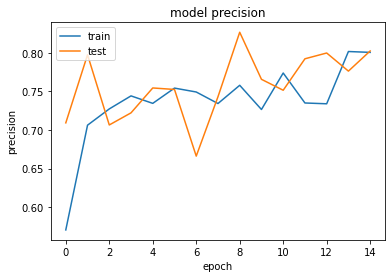

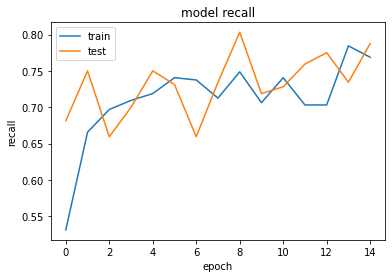

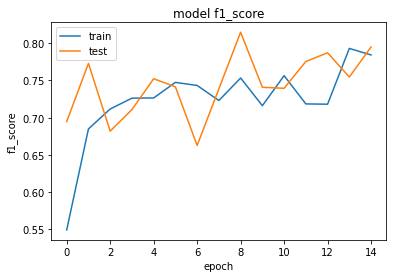

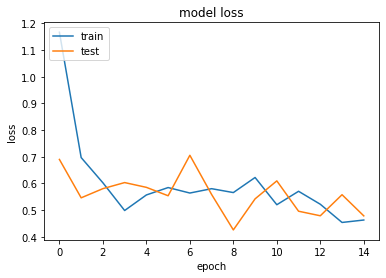

In [15]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**:

**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 

*Estes valores são exibidos durante o treinamento, utilize a última saída, exemplo:*

```
Epoch 10/10 [==============================] - 45s 9s/step - loss: 0.1234 - precision_score: 0.9742 - recall_score: 0.9683 - f1_score: 0.9712 - val_loss: 0.8819 - val_precision_score: 0.6912 - val_recall_score: 0.5649 - val_f1_score: 0.6216```

No caso acima, o valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 69,12%, 56,49% e 62,16%.

**Resposta**:
10/10 [==============================] - 57s 6s/step - loss: 0.4629 - precision_score: 0.8007 - recall_score: 0.7688 - f1_score: 0.7842 - val_loss: 0.4784 - val_precision_score: 0.8025 - val_recall_score: 0.7875 - val_f1_score: 0.7949


Os valores de precisão, sensibilidade e pontuação de validação são de  80,25%, 78,75% e 79,49% respectivamente 

### 4.5.2 Arquitetura VGG16

**Pergunta**: Explique como é constituída a arquitetura do VGG16? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

**Resposta**:
<p align="center">
    <img src="imagens/vgg16.png">
</p>
<p align="center">
    <img src="imagens/vgg16_2.png">
</p>



A Arquitetura vgg16 tem como entrada uma imagem rgb (ou seja, 3 canais) em 224x224.
Ela se concentra em ter filtros 3x3 na primeira passagem e 2x2 na segunda.

Possui duas camadas totalmente conetadas seguinda de um softmax para saída, ela possui 16 camadas de pesos.
ela possui cerca de 138 milhões de parâmetros, é uma rede bem pesada.

A VGG16 possui 13 camadas de convulação que retiram informações das imagens e 3 camadas totalmente conectadas que fazem as classificações

<p align="center">
    <img src="imagens/layersvgg.png">
</p>

In [16]:
conv_base = VGG16(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

58892288/58889256 [==============================] - 1s 0us/step


In [17]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [19]:
optimizer = optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [20]:
history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=10, 
                              steps_per_epoch=10, 
                              validation_data=val_generator)

Epoch 1/15
10/10 [==============================] - 125s 12s/step - loss: 2.4667 - precision_score: 0.4163 - recall_score: 0.3906 - f1_score: 0.4029 - val_loss: 1.0861 - val_precision_score: 0.5851 - val_recall_score: 0.5562 - val_f1_score: 0.5699
Epoch 2/15
10/10 [==============================] - 122s 12s/step - loss: 1.1200 - precision_score: 0.6560 - recall_score: 0.6370 - f1_score: 0.6462 - val_loss: 0.8102 - val_precision_score: 0.7317 - val_recall_score: 0.7063 - val_f1_score: 0.7186
Epoch 3/15
10/10 [==============================] - 125s 12s/step - loss: 1.1175 - precision_score: 0.6654 - recall_score: 0.6500 - f1_score: 0.6575 - val_loss: 1.0981 - val_precision_score: 0.6687 - val_recall_score: 0.6687 - val_f1_score: 0.6687
Epoch 4/15
10/10 [==============================] - 124s 12s/step - loss: 0.8334 - precision_score: 0.6910 - recall_score: 0.6781 - f1_score: 0.6845 - val_loss: 0.7584 - val_precision_score: 0.6867 - val_recall_score: 0.6781 - val_f1_score: 0.6823
Epoch 5/

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

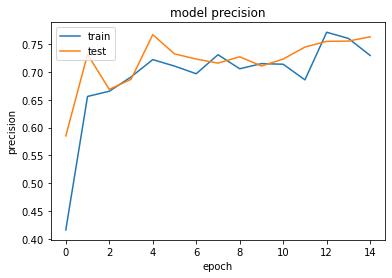

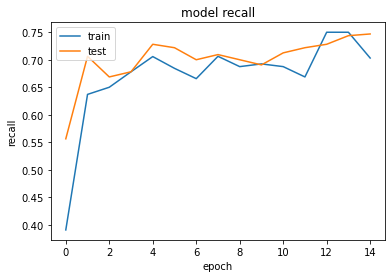

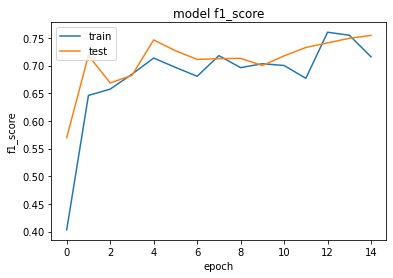

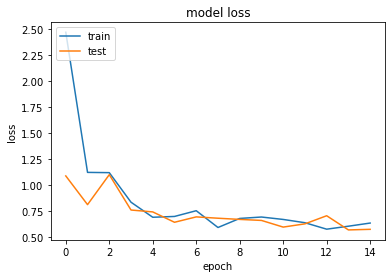

In [21]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**:

**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 

*Estes valores são exibidos durante o treinamento, utilize a última saída, exemplo:*

```
Epoch 10/10 [==============================] - 45s 9s/step - loss: 0.1234 - precision_score: 0.9742 - recall_score: 0.9683 - f1_score: 0.9712 - val_loss: 0.8819 - val_precision_score: 0.6912 - val_recall_score: 0.5649 - val_f1_score: 0.6216```

No caso acima, o valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 69,12%, 56,49% e 62,16%.

**Resposta**:
10/10 [==============================] - 124s 12s/step - loss: 0.6331 - precision_score: 0.7297 - recall_score: 0.7031 - f1_score: 0.7159 - val_loss: 0.5729 - val_precision_score: 0.7632 - val_recall_score: 0.7469 - val_f1_score: 0.7547

Precisão: 76,32%.
Sensibilidade: 74,69%.
Pontuação de validação: 75,47%

### 4.5.3 Arquitetura VGG19

**Pergunta**: Explique como é constituída a arquitetura do VGG19? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*


**Resposta**:


Usos da rede neural VGG
O principal objetivo para o qual a rede VGG foi projetada era vencer o ILSVRC, mas foi usado de várias outras maneiras.

Utilizados apenas como uma boa arquitetura de classificação para muitos outros conjuntos de dados e, como os autores disponibilizaram os modelos ao público, eles podem ser usados ​​como estão ou com modificações para outras tarefas semelhantes.
Transferência de aprendizado: também pode ser usado para tarefas de reconhecimento facial.
os pesos estão facilmente disponíveis com outras estruturas, como keras, para que possam ser mexidos e usados ​​conforme desejado.
Perda de conteúdo e estilo usando a rede VGG-19

Particularmente parecida com a vgg19, ela possui 3 camadas a mais, sendo uma camada a mais no quarto, uma no quinto e uma no sexto
bloco.

<p align="center">
    <img src="imagens/vgg19.png">
</p>


In [22]:
conv_base = VGG19(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

80142336/80134624 [==============================] - 1s 0us/step


In [23]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [25]:
optimizer = optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [26]:
history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=10, 
                              steps_per_epoch=10, 
                              validation_data=val_generator)

Epoch 1/15
10/10 [==============================] - 153s 15s/step - loss: 2.4774 - precision_score: 0.4448 - recall_score: 0.4265 - f1_score: 0.4351 - val_loss: 1.0873 - val_precision_score: 0.6349 - val_recall_score: 0.6187 - val_f1_score: 0.6267
Epoch 2/15
10/10 [==============================] - 155s 16s/step - loss: 1.0588 - precision_score: 0.5917 - recall_score: 0.5688 - f1_score: 0.5798 - val_loss: 0.8187 - val_precision_score: 0.7164 - val_recall_score: 0.7031 - val_f1_score: 0.7097
Epoch 3/15
10/10 [==============================] - 156s 16s/step - loss: 0.8156 - precision_score: 0.7187 - recall_score: 0.7000 - f1_score: 0.7090 - val_loss: 0.7438 - val_precision_score: 0.7271 - val_recall_score: 0.7094 - val_f1_score: 0.7180
Epoch 4/15
10/10 [==============================] - 155s 15s/step - loss: 0.7746 - precision_score: 0.7185 - recall_score: 0.6969 - f1_score: 0.7074 - val_loss: 0.8132 - val_precision_score: 0.7214 - val_recall_score: 0.7063 - val_f1_score: 0.7136
Epoch 5/

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

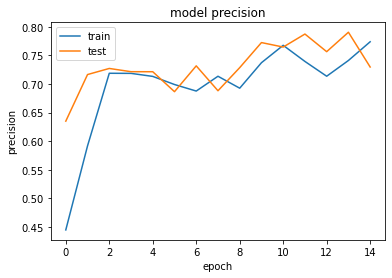

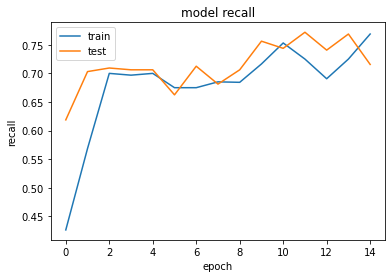

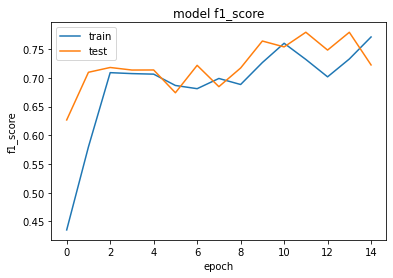

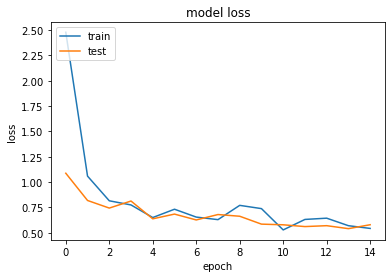

In [27]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**:

**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 

*Estes valores são exibidos durante o treinamento, utilize a última saída, exemplo:*

```
Epoch 10/10 [==============================] - 45s 9s/step - loss: 0.1234 - precision_score: 0.9742 - recall_score: 0.9683 - f1_score: 0.9712 - val_loss: 0.8819 - val_precision_score: 0.6912 - val_recall_score: 0.5649 - val_f1_score: 0.6216```

No caso acima, o valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 69,12%, 56,49% e 62,16%.

**Resposta**:
Epoch 15/15
10/10 [==============================] - 155s 16s/step - loss: 0.5432 - precision_score: 0.7738 - recall_score: 0.7688 - f1_score: 0.7712 - val_loss: 0.5795 - val_precision_score: 0.7296 - val_recall_score: 0.7156 - val_f1_score: 0.7225

Precisão: 72,96% <br>
Sensibilidade: 71,56% <br>
Pontuação de validação: 72,25% 

## 4.6 Compartivo de arquiteturas

Preencha a tabela abaixo com os valores dos indicadores de performance apresentados.

_O cálculo do F1-Score é dado por 2 * (Precisão * Sensibilidade) / (Precisão + Sensibilidade)._

|Modelo	Precisão (Precision)|Sensibilidade (Recall)|	F1-Score|
|---------------------------|----------------------|------------|
|resnet|	80,25%|	78,75%|	79,49%|
|vgg16|	76,32%|	74,69%|	75,49%|
|vgg19|	72,96%|	71,56%|	72,25%|


## 4.7 Conclusões

Analise os resultados da tabela de indicadores do comparativo de arquiteturas e explique os principais motivos pelos quais cada modelo obteve cada resultado.

**Respota**:

## 4.8 Abordagem Extra

Considerando os outros classificadores, escolha outro que ainda não foi utilizado, implemente abaixo. Ao final compare os resultados e explique os resultados.

_Não se esquece de utilizar as importações adequadas para cada modelo.
A forma de implementação deve respeitar as mesmas condições como valor de split e quantidade de imagens para poder comparar os modelos._

In [19]:
#IMPLEMENTE
from tensorflow.keras.applications import NASNetLarge
conv_base = NASNetLarge(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False
    

In [20]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 331, 331, 3) 0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 165, 165, 96) 2592        input_2[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 165, 165, 96) 384         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation_203 (Activation)     (None, 165, 165, 96) 0           stem_bn1[0][0]                   
____________________________________________________________________________________________

In [21]:
optimizer = optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [22]:
history = model.fit(train_generator, epochs=15, validation_steps=10, steps_per_epoch=10, 
                    validation_data=val_generator)

Epoch 1/15
10/10 [==============================] - 212s 21s/step - loss: 2.1100 - precision_score: 0.3668 - recall_score: 0.3156 - f1_score: 0.3311 - val_loss: 1.0805 - val_precision_score: 0.4345 - val_recall_score: 0.1125 - val_f1_score: 0.1756
Epoch 2/15
10/10 [==============================] - 196s 20s/step - loss: 1.8780 - precision_score: 0.3610 - recall_score: 0.3044 - f1_score: 0.3213 - val_loss: 1.7433 - val_precision_score: 0.3889 - val_recall_score: 0.3656 - val_f1_score: 0.3760
Epoch 3/15
10/10 [==============================] - 200s 20s/step - loss: 1.3050 - precision_score: 0.5528 - recall_score: 0.2750 - f1_score: 0.3214 - val_loss: 1.2578 - val_precision_score: 0.3913 - val_recall_score: 0.2969 - val_f1_score: 0.3299
Epoch 4/15
10/10 [==============================] - 199s 20s/step - loss: 1.0995 - precision_score: 0.5381 - recall_score: 0.2188 - f1_score: 0.2765 - val_loss: 1.2091 - val_precision_score: 0.4026 - val_recall_score: 0.3094 - val_f1_score: 0.3339
Epoch 5/

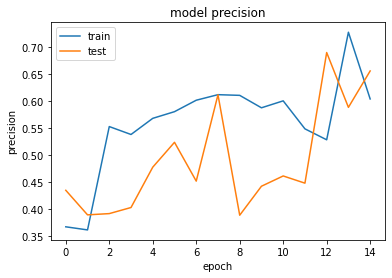

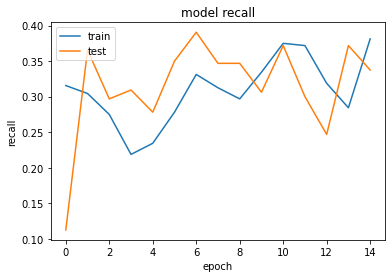

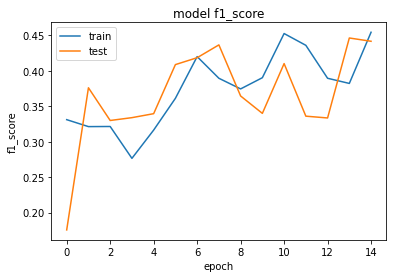

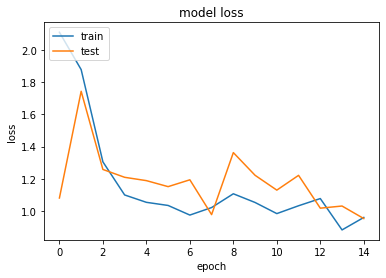

In [23]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 4.8.1 Conclusões sobre a abordagem extra

Como seu modelo performou em comparação com os demais modelos anteriores? Justifique sua resposta levando em consideração a arquitetura respectiva.

**Resposta**:

O Modelo não performou nada bem.

10/10 [==============================] - 197s 20s/step - loss: 0.9597 - precision_score: 0.6041 - recall_score: 0.3812 - f1_score: 0.4543 - val_loss: 0.9529 - val_precision_score: 0.6560 - val_recall_score: 0.3375 - val_f1_score: 0.4416


Precisão: 65,60% <br>
Sensibilidade: 33,75% <br>
Pontuação de validação: 44,16% 

é quase dizer que 'você pode ou não estar com pneumonia'.

Porém o modelo poderia e deve se sair melhor com mais treinamento, mais épocas e mais testes. Com o mesmo número de épocas, o grande vencedor aqui foi o resnet50.

Este modelo apresentava a curva em ascenção e a perda de modelo e descensão. Bons indicativos.
